Show linear regression technique for user values.Create a Linear Regression Model
using Python/R to predict home prices using Boston Housing Dataset.
The Boston Housing dataset contains information about various houses in Boston
through different parameters. There are 506 samples and 14 feature variables in
this dataset. The objective is to predict the value of prices of the house using the given
features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
boston = pd.read_csv(r"C:\Users\Niraj More\OneDrive\Desktop\DSBDA\Practice\PR_EXAM_DATASET\HousingData.csv")

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
boston = boston.dropna()

In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: >

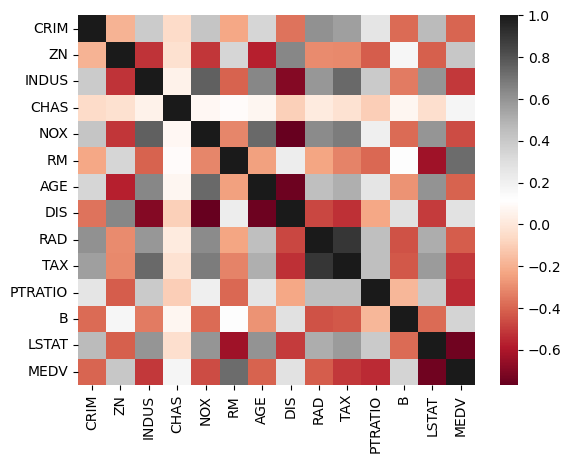

In [9]:
sns.heatmap(boston.corr(),cmap='RdGy')

In [10]:
x=boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=boston['MEDV']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=3)

In [12]:
x_train.shape




(295, 13)

In [13]:
x_test.shape

(99, 13)

In [14]:
y_train.shape

(295,)

In [15]:
y_test.shape

(99,)

In [16]:
model =LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred

array([12.88353588, 13.65669857, 31.65286017, 21.05980562, 35.7097032 ,
       32.73703865, 16.97535542, 17.49986753, 23.59775748, 32.1239354 ,
       22.87141514, 18.3068301 , 28.42112774, 38.90515668, 38.48382723,
       24.82016698, 22.98453801, 31.18038168, 18.242325  , 25.78336153,
       26.87672015, 16.52161758, 18.78392143, 10.88139626, 11.01737213,
       20.98464485,  9.77797871, 20.62120982, 28.01797476, 19.5436076 ,
       34.49384273, 28.35665271, 20.96673609, 13.66597098, 24.96852903,
       12.81254002, 13.79032931, 21.28409745, 34.60598578, 19.64650241,
       23.44484658, 34.68156985, 19.84580047, 19.47229366, 19.6494262 ,
       20.91389743, 14.79859587, 22.01050801, 18.77778572, 24.55278277,
       14.75094665, 23.83248405, 14.20177658, 18.11639321, 30.64634996,
       15.1896446 , 26.10910249, 18.91211685, 17.71969368, 18.79541387,
       21.09563749, 31.80418429, 26.0663354 , 20.13238568, 21.57153672,
       19.43651979, 22.09100272, 21.1064775 , 27.0233422 , 34.09

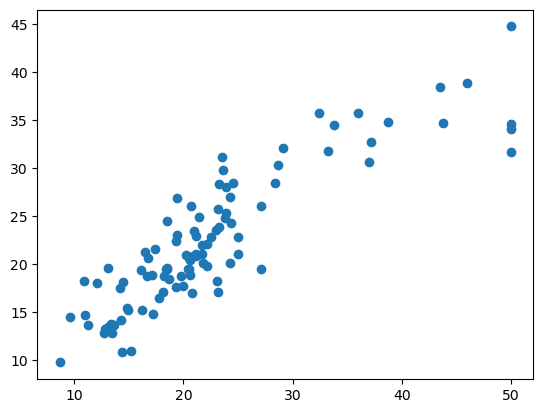

In [20]:
plt.scatter(y_test,y_pred)


In [21]:
print("mean_squared_error :" ,mean_squared_error(y_test,y_pred) )
print("mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("Model Score",model.score(x_test,y_test))

mean_squared_error : 19.89251518237681
mean_absolute_error : 3.0259643939081142
Model Score 0.7623642079966013
